In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

facebook = pd.read_csv('DATA/dataset_Facebook.csv', delimiter=";")


In [2]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [3]:
facebook.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [4]:
facebook['Category'] = facebook['Category'].astype('str')
facebook['Post Weekday'] = facebook['Post Weekday'].astype('str')
facebook['Post Hour'] = facebook['Post Hour'].astype('str')
facebook['Paid'] = facebook['Paid'].astype('bool')


In [5]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    object 
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    object 
 5   Post Hour                                                            500 non-null    object 
 6   Paid                                                                 500 non-null    bool   
 7   Lifetime

In [6]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    object 
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    object 
 5   Post Hour                                                            500 non-null    object 
 6   Paid                                                                 500 non-null    bool   
 7   Lifetime

In [7]:
facebook

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,False,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,False,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,False,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,True,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,False,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,False,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,False,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,False,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,False,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [8]:
ppm = facebook['Post Month'].value_counts().sort_index()
ppm 

1     25
2     26
3     36
4     50
5     37
6     49
7     52
8     34
9     36
10    60
11    45
12    50
Name: Post Month, dtype: int64

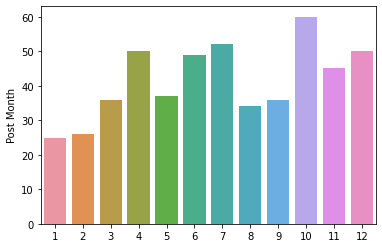

In [9]:
# post by month
sns.barplot(x=ppm.index, y=ppm)


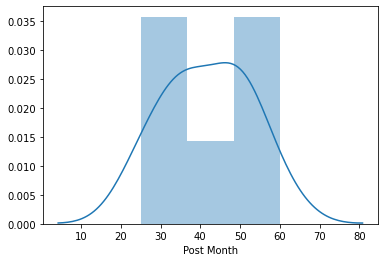

In [10]:
sns.distplot(ppm)

In [11]:
bycat = facebook['Category'].value_counts
#ptl = facebook['Page total likes']
#ptl
bycat

<bound method IndexOpsMixin.value_counts of 0      2
1      2
2      3
3      2
4      2
      ..
495    3
496    2
497    1
498    3
499    2
Name: Category, Length: 500, dtype: object>

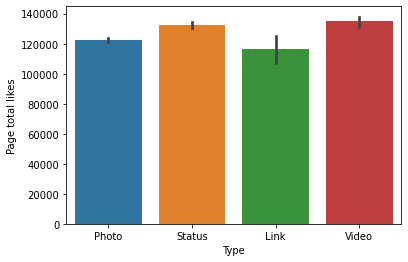

In [12]:
fl = facebook['Page total likes']
ft = facebook['Type']
sns.barplot(x=ft, y=fl)

In [13]:
ft = facebook.groupby('Type')
ft
#facebook['Page total likes'][ft]

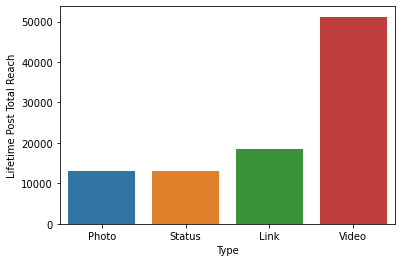

In [14]:
sns.barplot(x = facebook['Type'], y = facebook['Lifetime Post Total Reach'], ci = False)

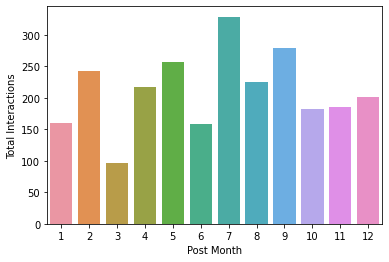

In [15]:
sns.barplot(x = facebook['Post Month'], y = facebook['Total Interactions'],ci = False)

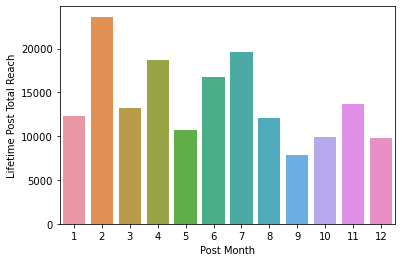

In [16]:
sns.barplot(x = facebook['Post Month'], y = facebook['Lifetime Post Total Reach'], ci = False)

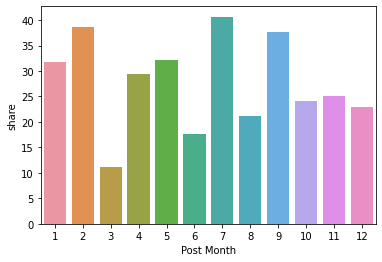

In [17]:
sns.barplot(x = facebook['Post Month'], y = facebook['share'], ci = False)

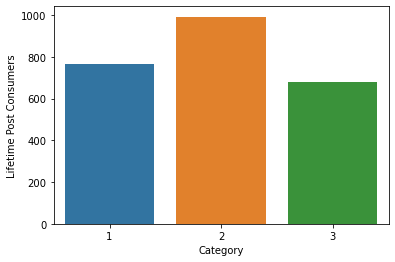

In [19]:
sns.barplot(x = facebook['Category'], y = facebook['Lifetime Post Consumers'], ci = False)